# Escalamiento de datos numéricos

En general, la estandarización tiene el objetivo principal de centrar los números alrededor de cero y lograr que las características tengan una media de cero y una desviación estándar de uno. Sin embargo, existen diferentes métodos de estandarización y normalización que tienen objetivos ligeramente diferentes.

Los dos métodos de estandarización más comunes son:

## Z-Score Standardization (StandardScaler): 

Este método, que hemos visto anteriormente, transforma los datos para que tengan media cero y desviación estándar de uno. Los valores se escalan utilizando la siguiente fórmula:


z = (x - mean) / std



## MinMax Scaling (MinMaxScaler): 

Este método ajusta los datos para que estén en un rango específico, generalmente entre 0 y 1. Los valores se escalan utilizando la siguiente fórmula:


x_scaled = (x - min) / (max - min)


### Transformaciones lineales

In [1]:
import timeit
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

# Carga del dataset de diabetes con las características y la variable objetivo
X, y = datasets.load_diabetes(return_X_y=True)

# Extracción de la tercera característica de cada registro
# y creación de un arreglo bidimensional con una sola columna
raw = X[:, None, 2]
raw
# La transformación: raw = X[:, None, 2]
# Note: X tiene un shape de (442, 10) para nuestro estudio solo necesitamos una columna, buscamos tener un raw con shape (442, 1)

# : toma todas las columnas y filas.
# None indica la transformación del arreglo (newaxis)
# 2 Selecciona la 3ra columna de X.


array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

Detalles del dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

(array([32., 66., 98., 90., 61., 53., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

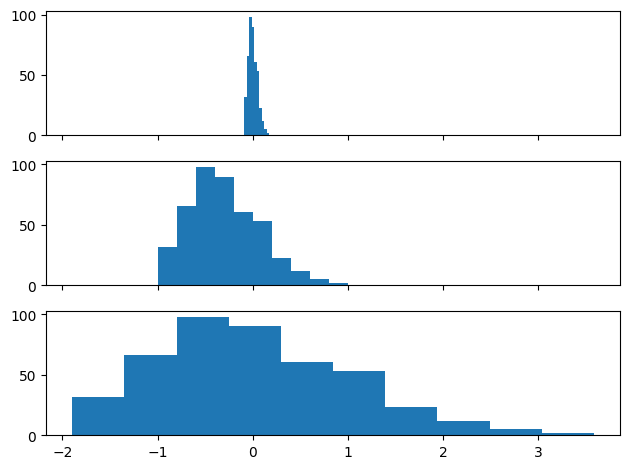

In [2]:
# escalamiento max-min
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

# normalización Z-score

avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)

axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(z_scaled)

ejemplo de funcion linear regression 

In [3]:
# EJEMPLO DE LA FUNCION LinearRegression
from sklearn.linear_model import LinearRegression

# Crear algunos datos de muestra
X = [[1], [2], [3], [4], [5]]
y = [2, 4, 6, 8, 10]

# Crear un objeto LinearRegression
model = LinearRegression()

# Ajustar el modelo a los datos de muestra
model.fit(X, y)

# Hacer una predicción sobre nuevos datos
x_new = [[6]]
y_new = model.predict(x_new)

print(y_new)  # Salida: [12.]
# su funcion es hacer predicciones de un conjunto de numeros como si fuera una serie 
# La idea detrás de la regresión lineal es encontrar una relación lineal entre una variable independiente (o característica)
# y una variable dependiente (o respuesta) que permita predecir el valor de la variable dependiente para nuevos valores de la variable independiente.

[12.]


In [4]:
# modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [7]:
# muestra el tiempo que va a tomar
raw_time = timeit.timeit(train_raw,number=100  )# Función que se va a medir # Número de veces que se ejecutará la función
scaled_time = timeit.timeit(train_raw, number = 100)
z_scaled_time = timeit.timeit(train_raw, number = 100)
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

ValueError: Found input variables with inconsistent numbers of samples: [442, 5]

* max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

Utilidades de Scikit Learn : https://scikit-learn.org/stable/modules/preprocessing.html

### Transformaciones no lineales

la transformacion no lineal es para datos que estan altamente segados 


In [ ]:
df = pd.read_csv('cars.csv')

<Axes: >

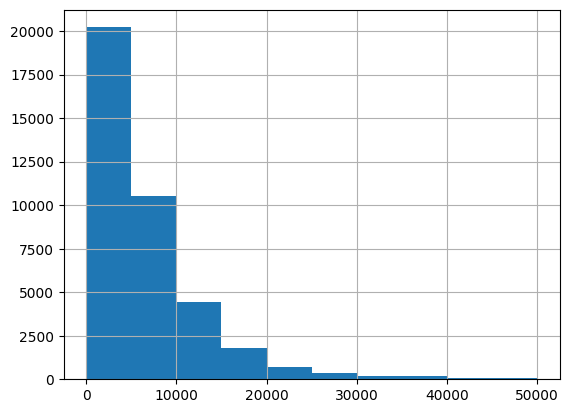

In [ ]:
df.price_usd.hist()

Transformación con $$tanh(x)$$

<Axes: >

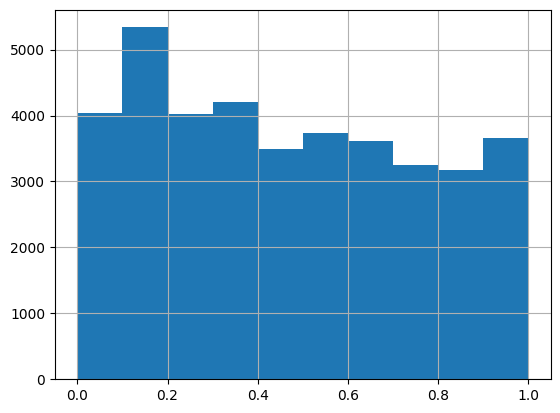

In [ ]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()
# df.price_usd: acceder a la columna "price_usd" del dataframe "df"
# apply(): aplicar una función a cada elemento de la columna "price_usd"
# lambda x: np.tanh(x/p): definir una función lambda que toma un argumento "x" y devuelve la tangente hiperbólica de "x/p" utilizando numpy
# hist(): graficar un histograma de los valores resultantes de aplicar la función lambda a cada elemento de la columna "price_usd"

de esta manera podemos hacer que unos datos sesgados puedan tener una estructura que nuestro modelo de machine lerning pueda interpretar 

* mapear datos a una distribucion gaussiana: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3f569948-e9a8-454f-8f4d-a27aa1610a87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>